In [1]:
df_train = pd.read_csv('../input/train.csv')

In [15]:
df_train.shape

(1460, 81)

## 欠損の分析

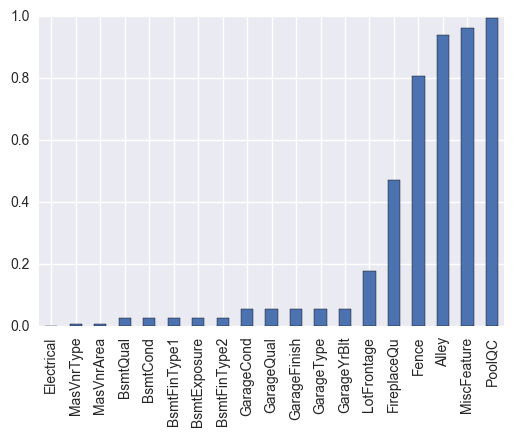

In [16]:
missing = df_train.isnull().sum()
missing = missing[missing>0]/df_train.shape[0]
missing.sort_values().plot.bar()

In [18]:
df_train.query('PoolArea > 0')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


### メモ
* PoolIQC はプールのクオリティ．殆どの家にプールなんかついてないからそりゃ欠損ばっかりか．そもそもPoolArea(プールの面積)が0より大きい物件が7件しかない．
* MiscFeature は他カテゴリに含まれない別の情報．エレベータとか2つ目のガレージとか．
* Alley は物件への路地の様子．砂利か舗装されているか路地が無いか．

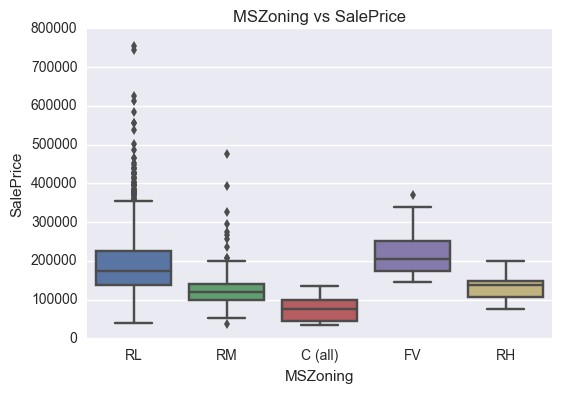

In [4]:
feature = 'MSZoning'
ax = sns.boxplot(df_train[feature], df_train['SalePrice'])
ax.set_title(feature + ' vs SalePrice')

In [9]:
df_train[df_train['MSZoning']=='C (all)']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
557,558,50,C (all),60.0,11040,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,9,2006,COD,Normal,108000
711,712,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,102776
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1279,1280,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml,68400
